<a href="https://colab.research.google.com/github/jamessingh1/-Food-Image-Classification-using-Transfer-Learning/blob/main/Food101_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Install TensorFlow Datasets
# !pip install tensorflow-datasets

"""
What this does:
- installs tensorflow-datasets, a library that provides many pre-built datasets like Food-101, MNIST, CIFAR-10, etc., ready for use in ML models.
"""

# STEP 2: Import Required Libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#STEP 3: Load the Food-101 Dataset

(ds_train, ds_test), ds_info = tfds.load(

    'food101',

    split=[ 'train', 'validation' ],

    shuffle_files=True,

    as_supervised=True,

    with_info=True

)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.G3T0RJ_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.G3T0RJ_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [ ]:
# STEP 4: View Dataset Information
print(f"Total Classes: {ds_info.features['label'].num_classes}")
print(f"Sample Classes: {ds_info.features['label'].names[:10]}")

Total Classes: 101
Sample Classes: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


In [ ]:
# STEP 5: Preprocess the Images
IMG_SIZE = 224
BATCH_SIZE = 32

def preprocess(image, label):
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) # Resize to 224x224
  image = tf.cast(image, tf.float32) / 255.0       # Normalize pixels [0,1]
  return image, label

# Apply preprocessing to the datasets
ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

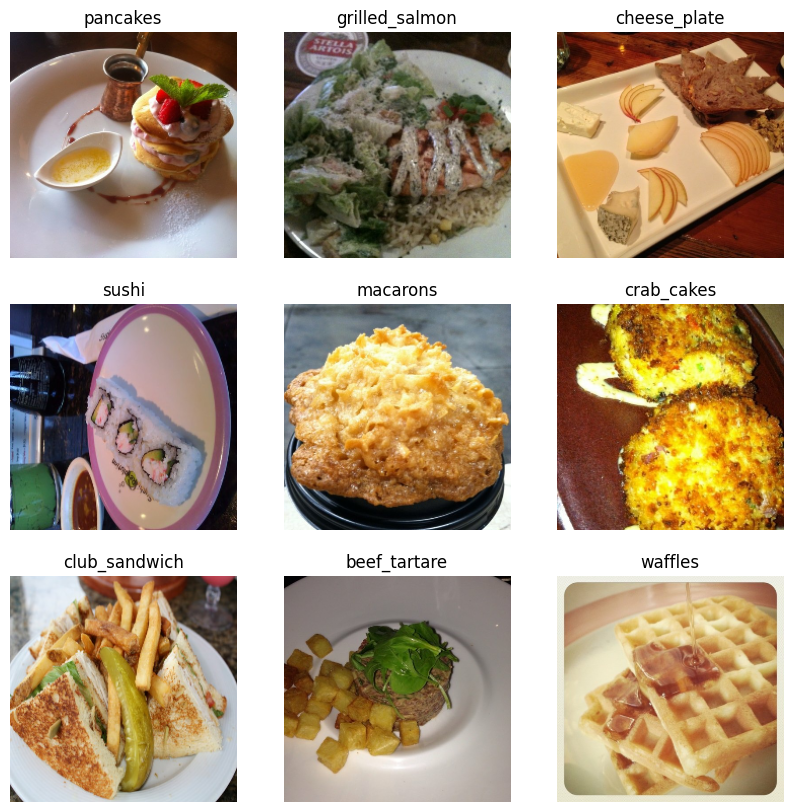

In [ ]:
# STEP 6: Visualize Images
for images, labels in ds_train.take(1):
  plt.figure(figsize=(10, 10))
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy())
    label = ds_info.features['label'].int2str(labels[i].numpy())
    plt.title(label)
    plt.axis("off")
  plt.show()

In [ ]:
# STEP 7: Build the CNN Model (Transfer Learning)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False # Freeze base layers

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(), # Flatten feature maps
    tf.keras.layers.Dense(101, activation='softmax') # 101 food categories
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# STEP 8: Compile the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#STEP 9: Train the Model

history = model.fit(ds_train, epochs=5, validation_data=ds_test)

Epoch 1/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3845s 2s/step - accuracy: 0.3844 - loss: 2.5949 - val_accuracy: 0.5728 - val_loss: 1.6315
Epoch 2/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5746 - loss: 1.6603

In [ ]:
#STEP 10: Evaluate the Model
loss, accuracy = model.evaluate(ds_test)
print (f"Test Accuracy: {accuracy * 100 : .2f}%")

NameError: name 'model' is not defined

In [ ]:
# STEP 11: Make Predictions & Show Results
class_names = ds_info.features['label'].names

for images, labels in ds_test.take(1):
  image = images[0]
  true_label = class_names[labels[0].numpy()]

  prediction = model.predict(tf.expand_dims(image, axis=0))
  predicted_label = class_names[np.argmax(prediction)]

  plt.imshow(image)
  plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
  plt.axis('off')
  plt.show()

In [ ]:
# STEP 12: Save the Trained Model (Optional)
model.save("food101_model.h5") # Save to file
# Saves the trained model in .h5 format so you can reuse it later.